### [4th McKinsey Data Analytics Hackaton](https://datahack.analyticsvidhya.com/contest/mckinsey-analytics-online-hackathon-4/#problem_statement)

[[Results]](https://www.analyticsvidhya.com/blog/2018/07/top-highlights-from-avs-record-breaking-weekend-online-hackathon/)

## Description

The participants were tasked with building a model for an insurance company for predicting the propensity to pay renewal premium and build an incentive plan for its agents to maximize the net revenue (i.e. renewals – incentives given to collect the renewals) collected from the policies post their issuance.

The participants were provided information about past transactions from the policy holders along with their demographics. Given this information, the the challenge was to predict the propensity of renewal collection and create an incentive plan for agents (at policy level) to maximise the net revenues from these policies.

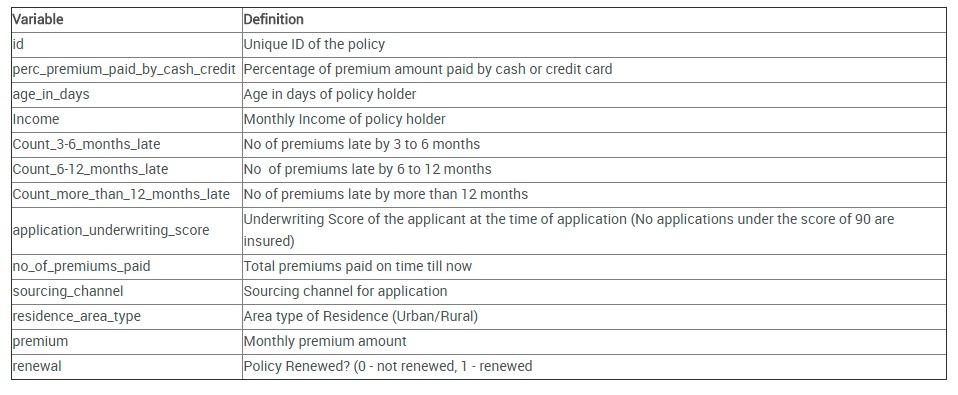

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv('train_ZoGVYWq.csv')
df.columns = df.columns.str.replace('-', '_')
df['all_late'] = df.Count_3_6_months_late + df.Count_6_12_months_late + df.Count_more_than_12_months_late
df['cancel'] = abs(df['renewal']-1)

In [27]:
hist_columns = ['perc_premium_paid_by_cash_credit', 'age_in_days', 'Income', 'Count_3_6_months_late', 'Count_6_12_months_late', 
'Count_more_than_12_months_late', 'application_underwriting_score', 'no_of_premiums_paid', 'premium', 'all_late']

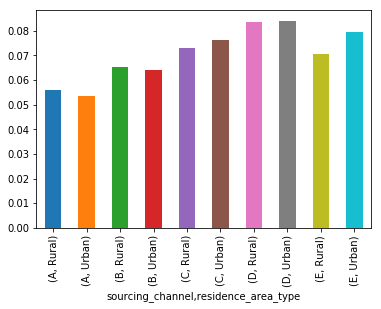

In [28]:
(df.groupby(['sourcing_channel', 'residence_area_type']).sum().loc[:, 'cancel']/df.groupby(['sourcing_channel', 'residence_area_type']).count().loc[:, 'cancel']).plot.bar();

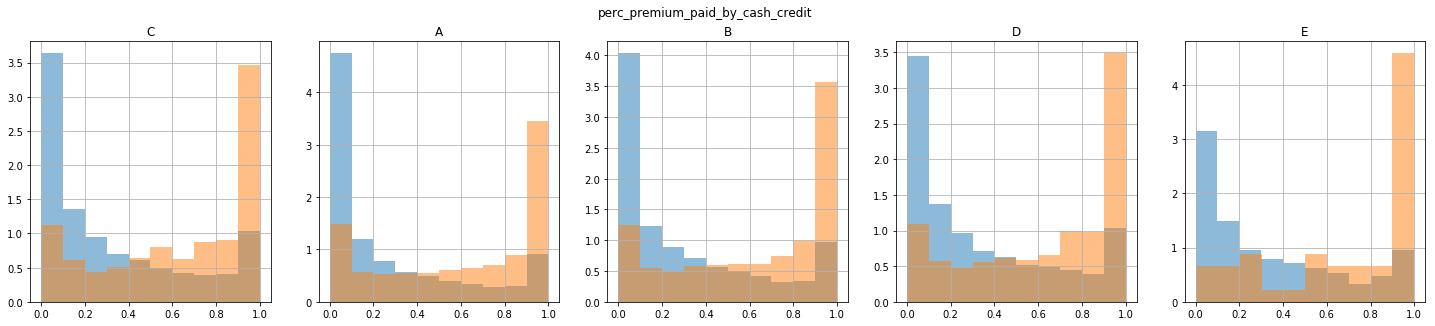

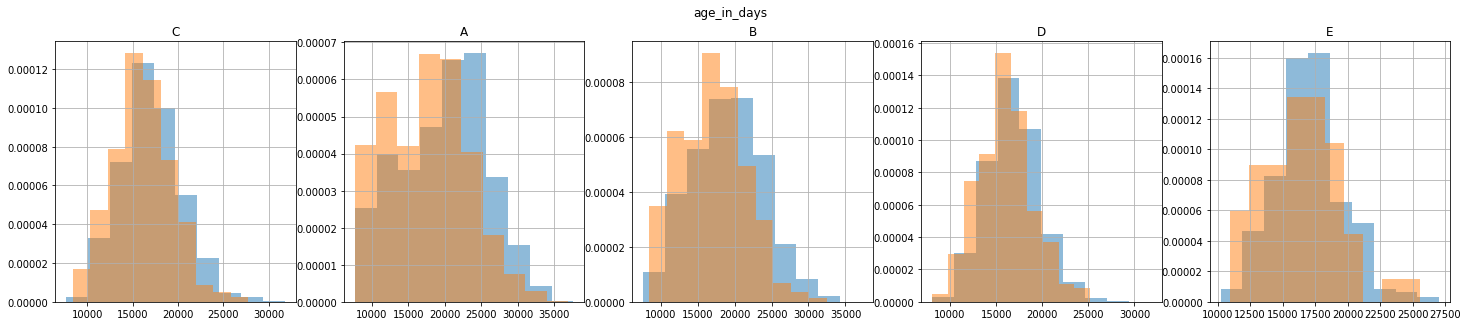

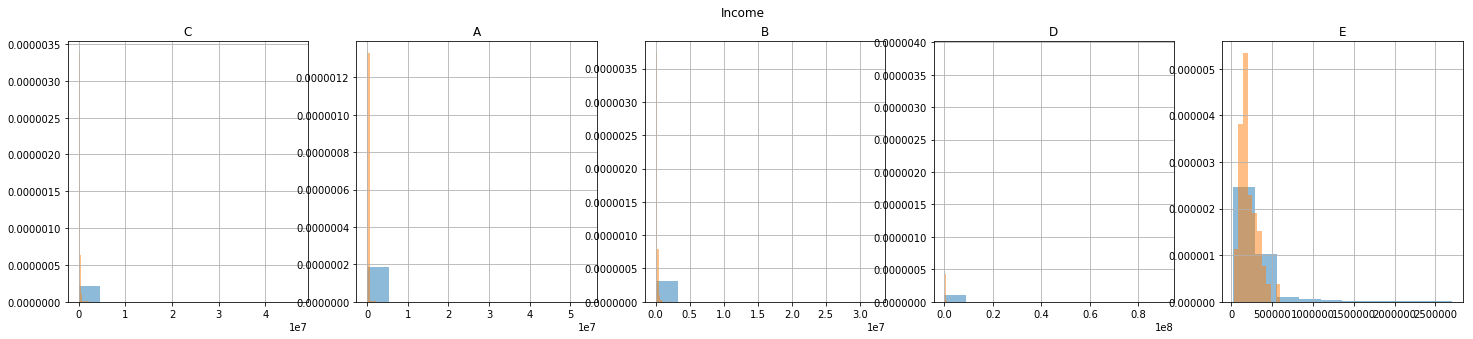

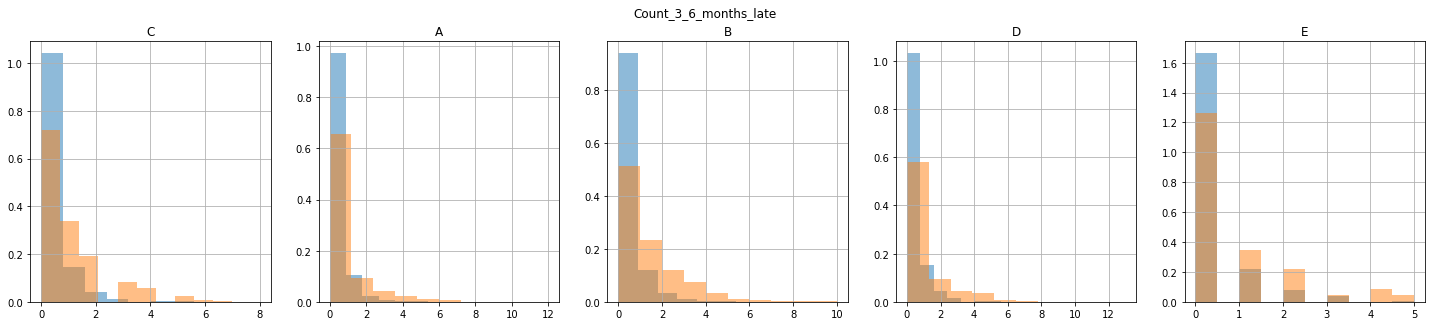

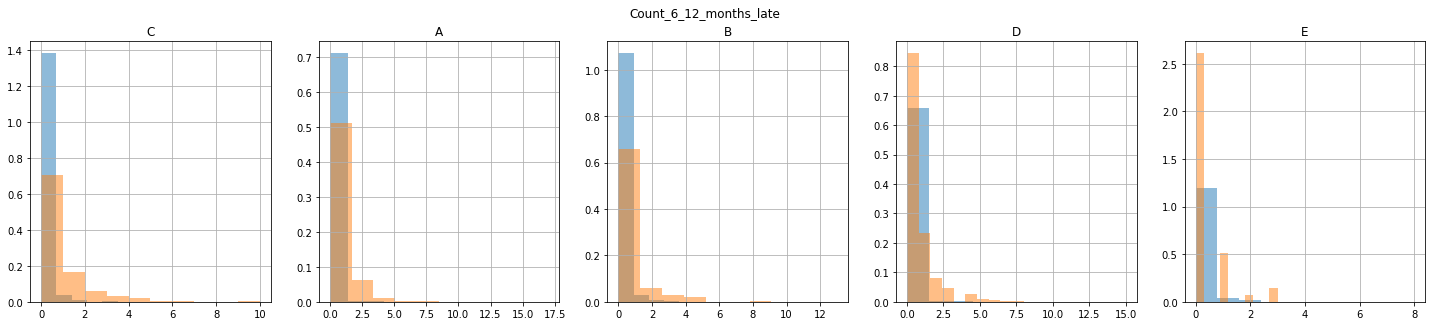

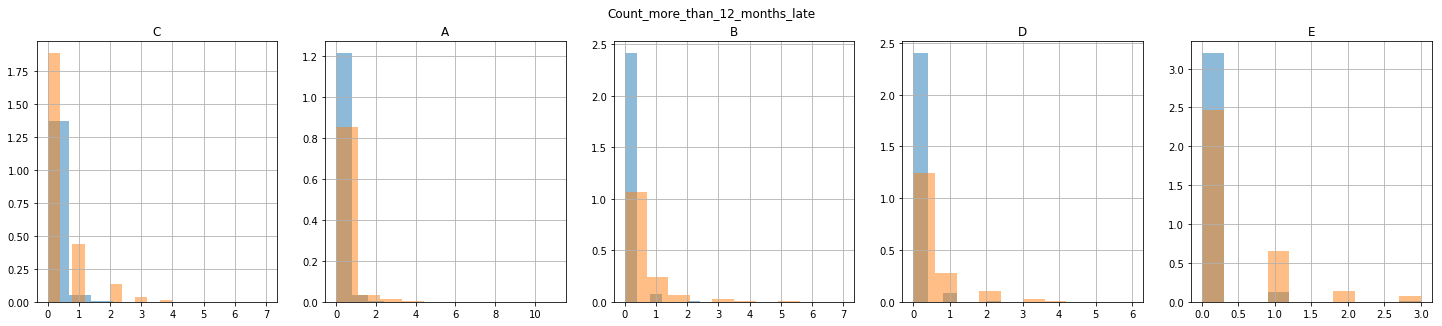

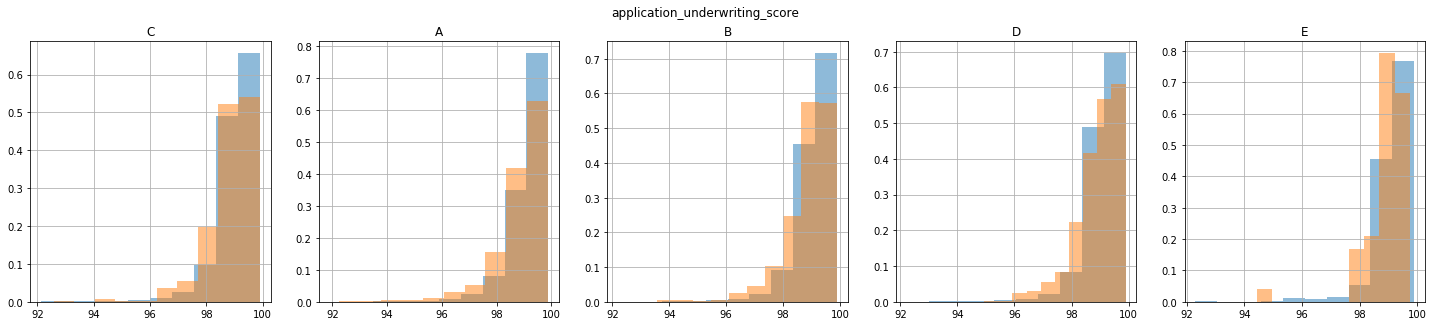

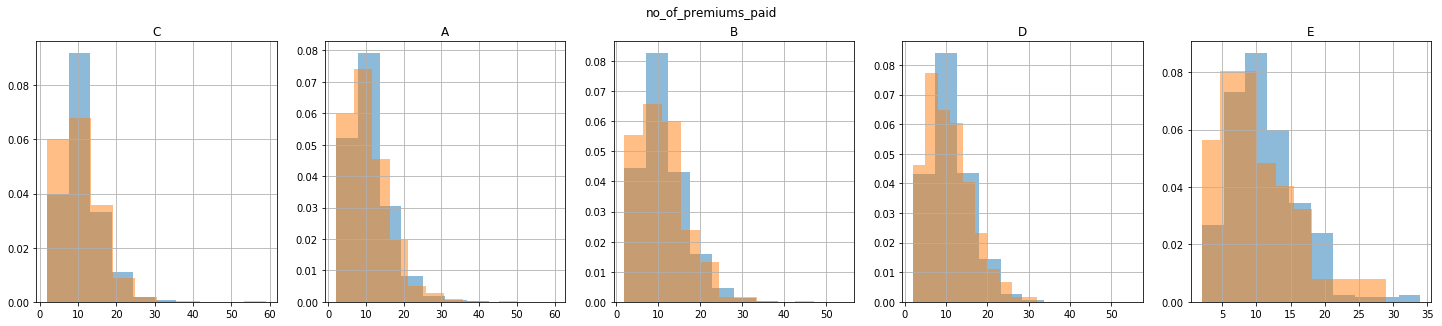

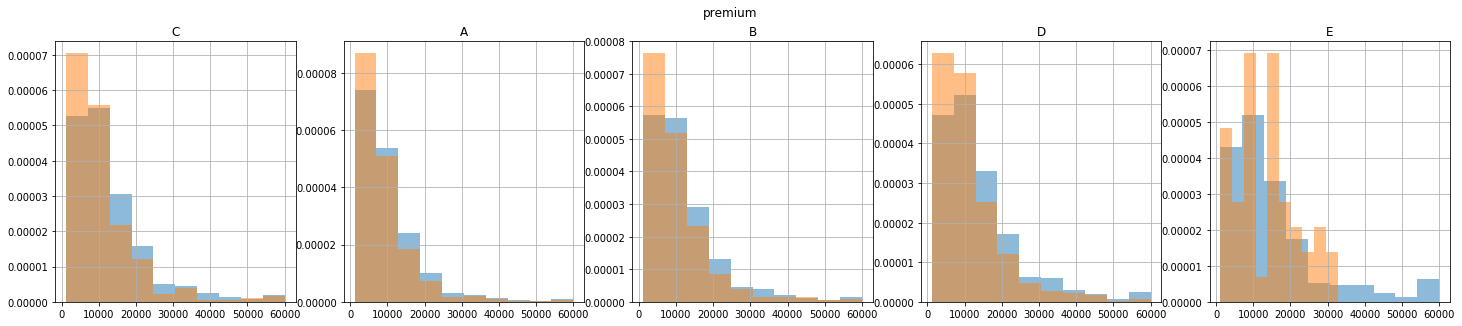

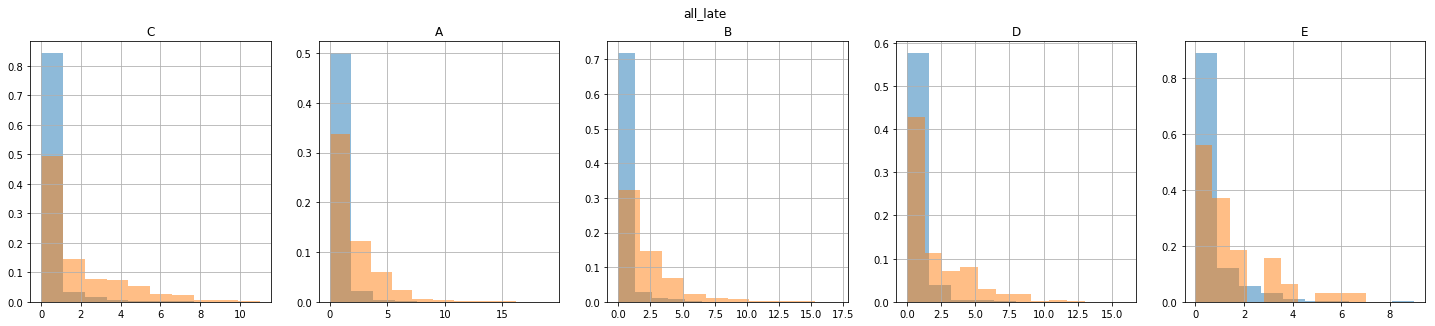

In [29]:
density = True
for col in hist_columns:
#     plt.figure()
#     plt.title(col)
#     (df.loc[df.cancel==0, col].reset_index(drop=True)).hist(density=True, alpha=0.5)
#     (df.loc[df.cancel==1, col].reset_index(drop=True)).hist(density=True, alpha=0.5)
    segmented_column = 'sourcing_channel'
    segment = df[segmented_column].unique()
    fig = plt.figure(figsize=(25, 4.8))
    fig.suptitle(str(col))
    for subclass in range(len(segment)):
        ax = fig.add_subplot(int('1'+str(len(segment))+str(subclass+1)))
        ax.set_title(str(segment[subclass]))
        for i in range(2):
            (df.loc[(df.cancel==i) & (df[segmented_column]==segment[subclass]), col].reset_index(drop=True)).hist(density=density, alpha=0.5)

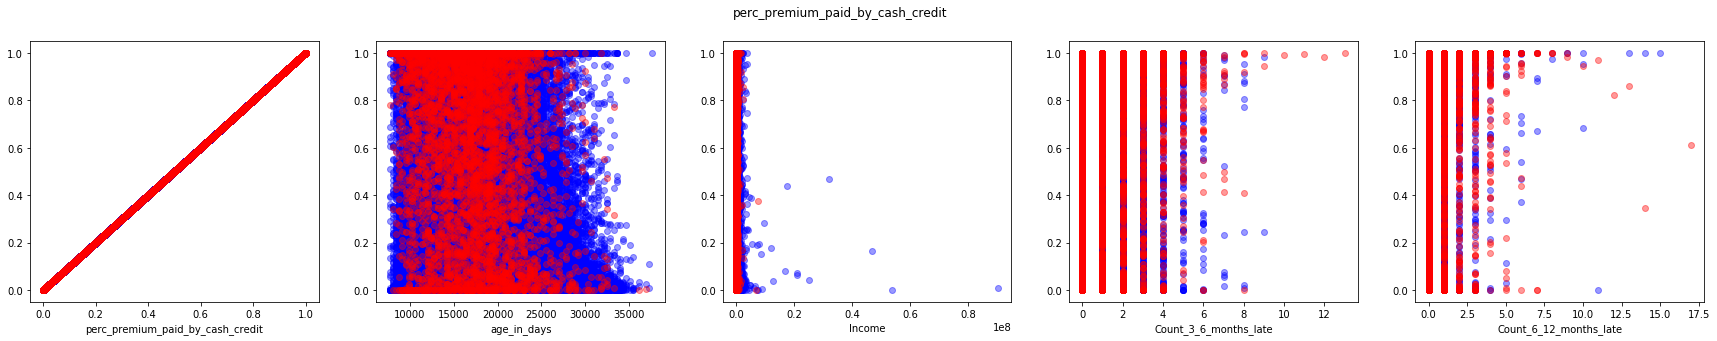

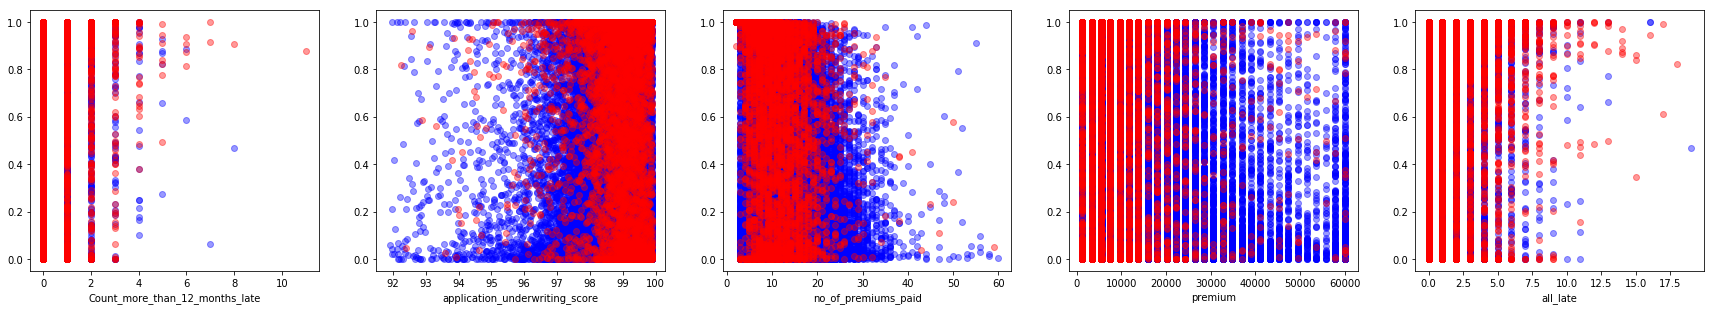

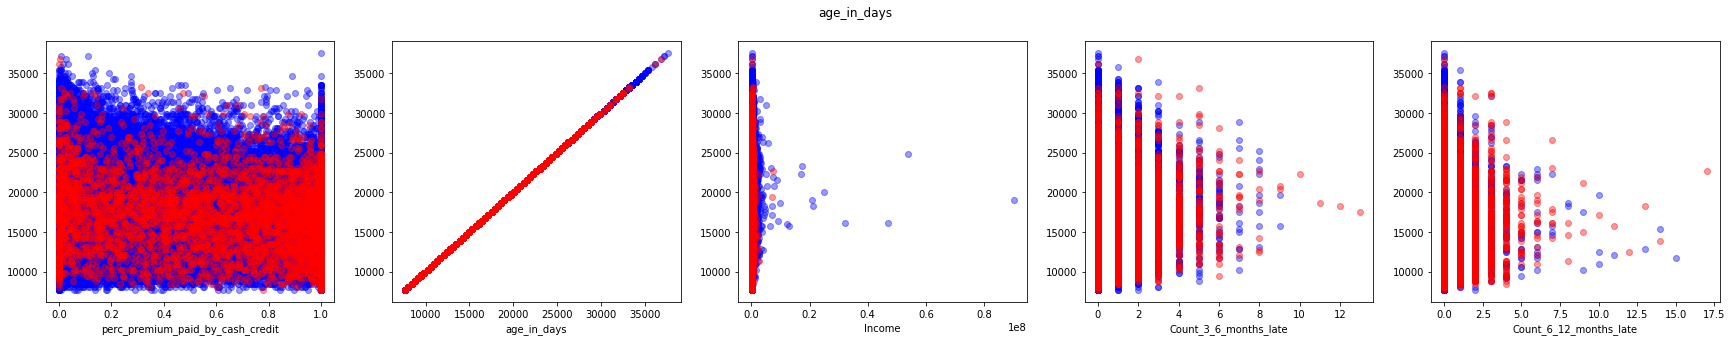

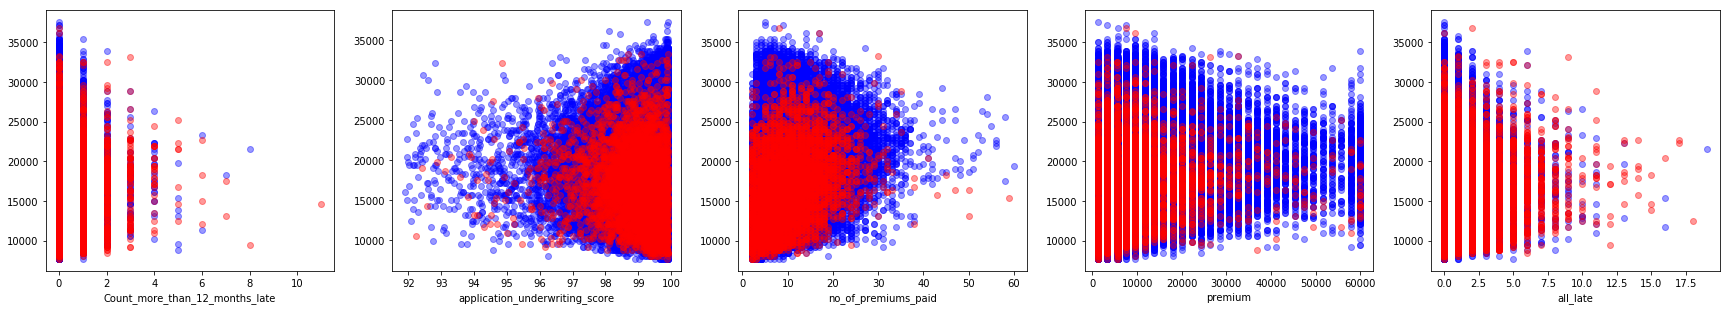

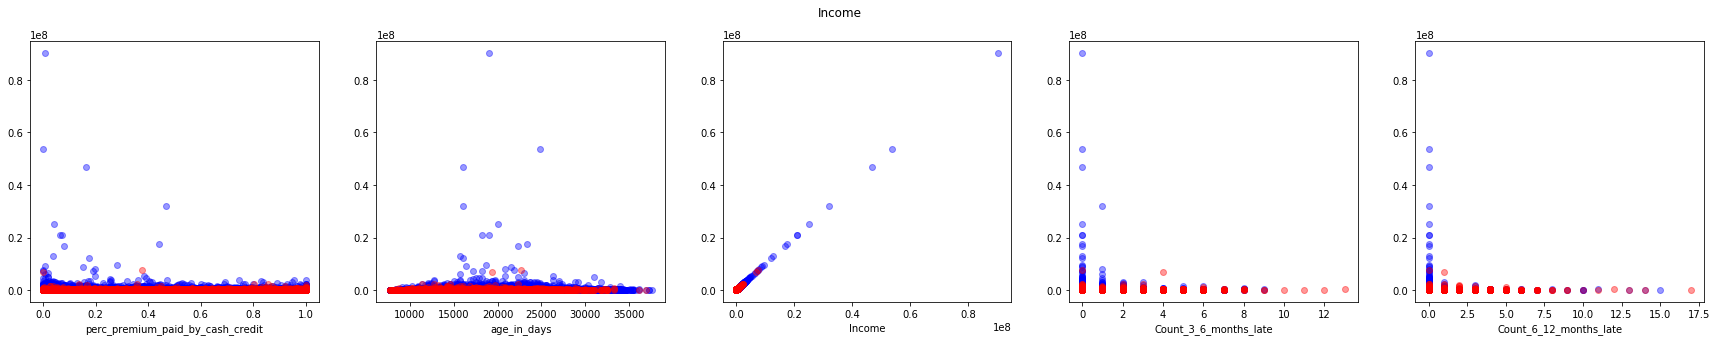

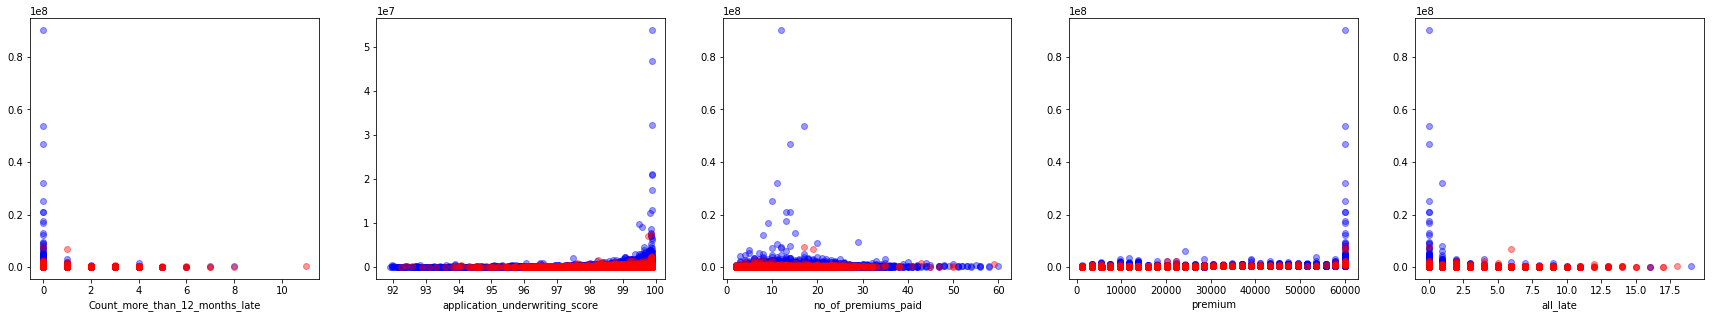

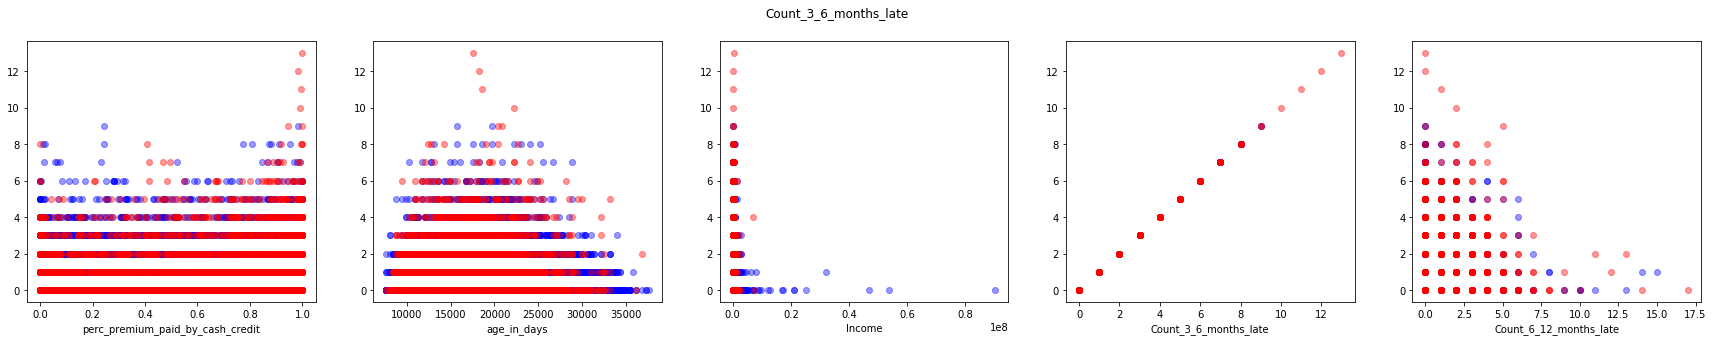

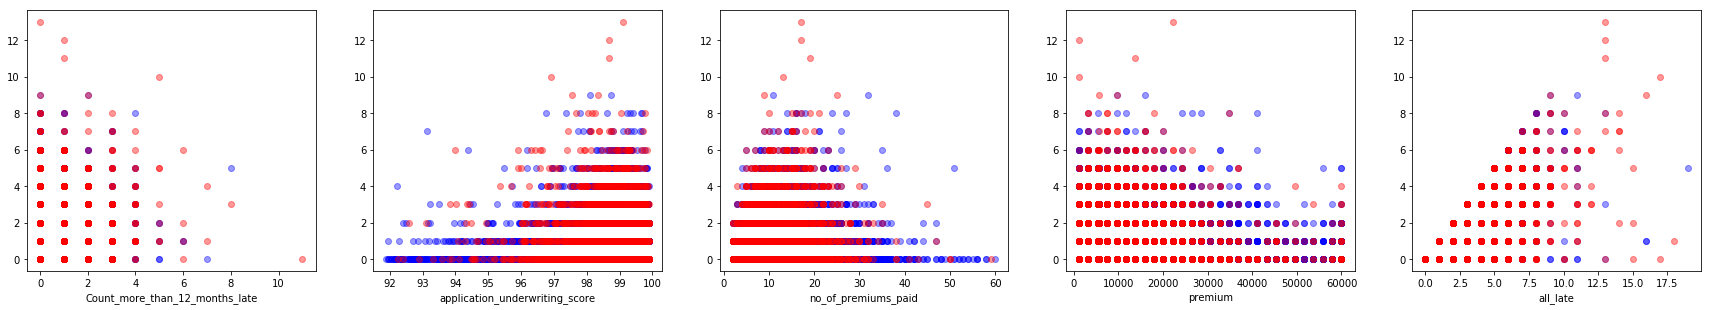

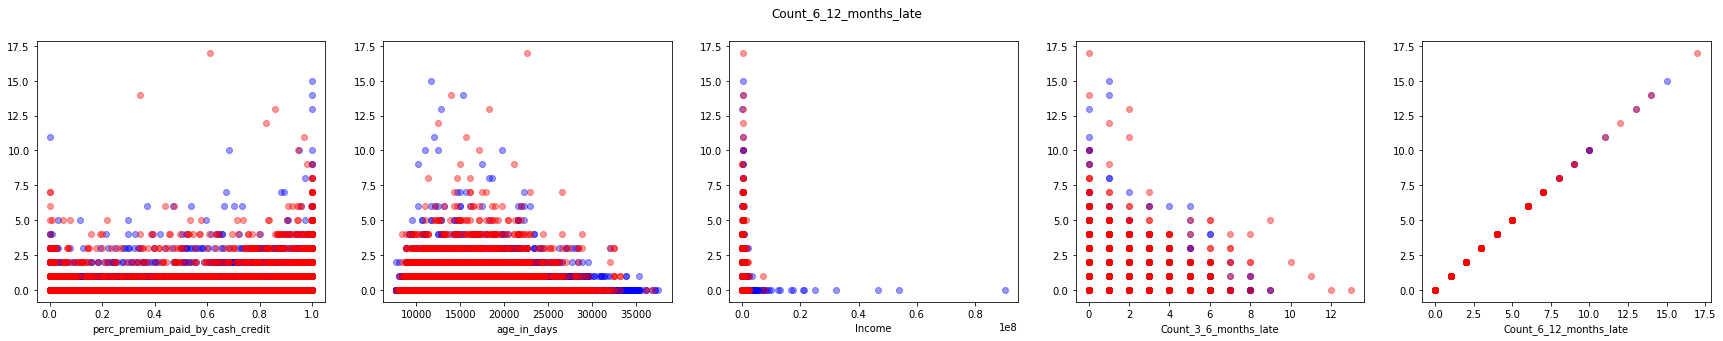

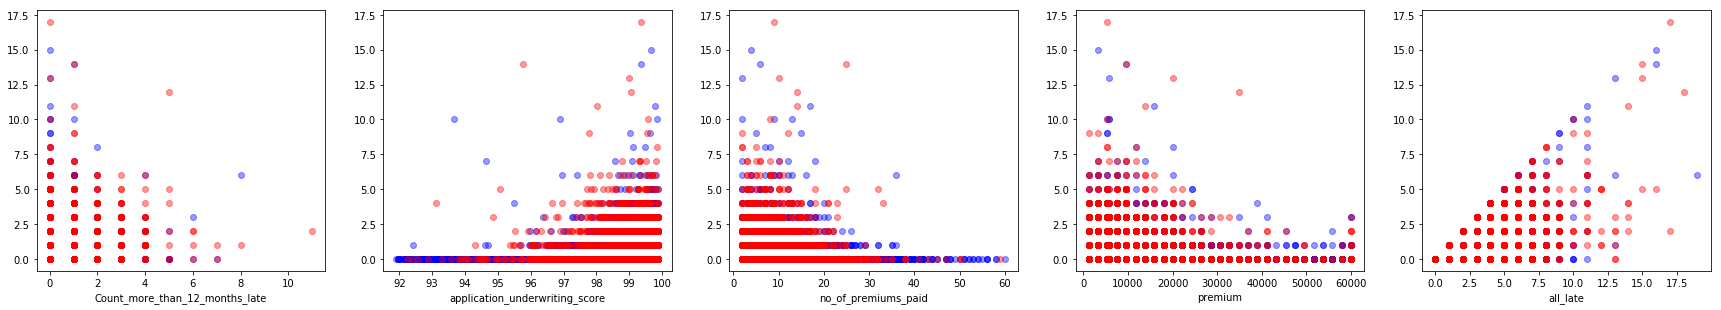

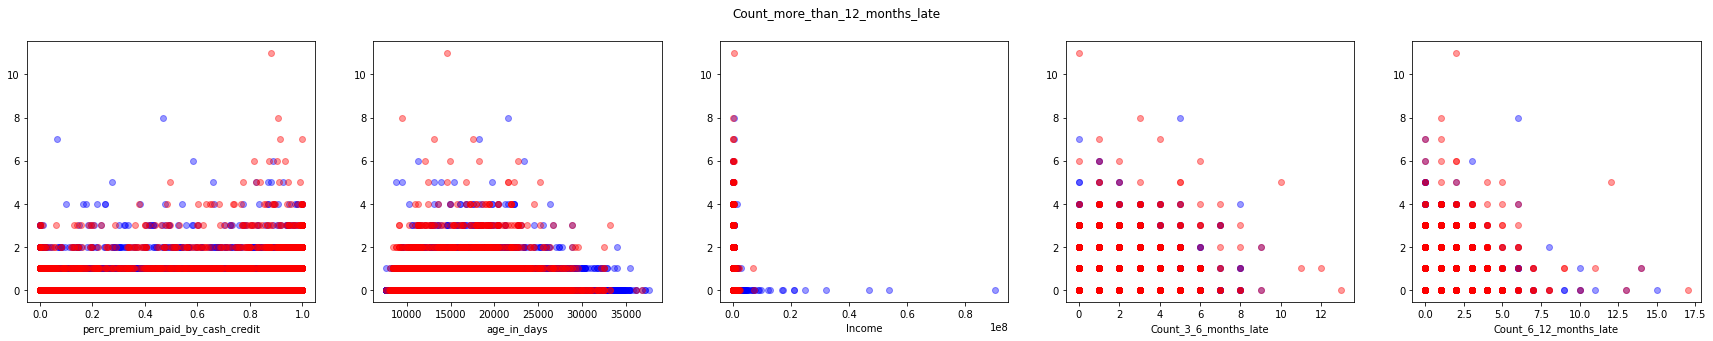

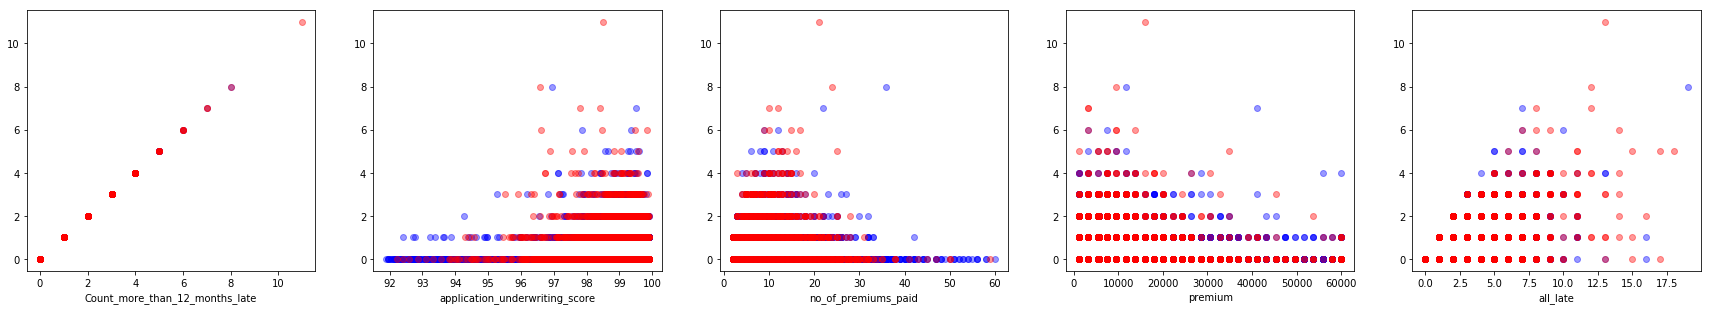

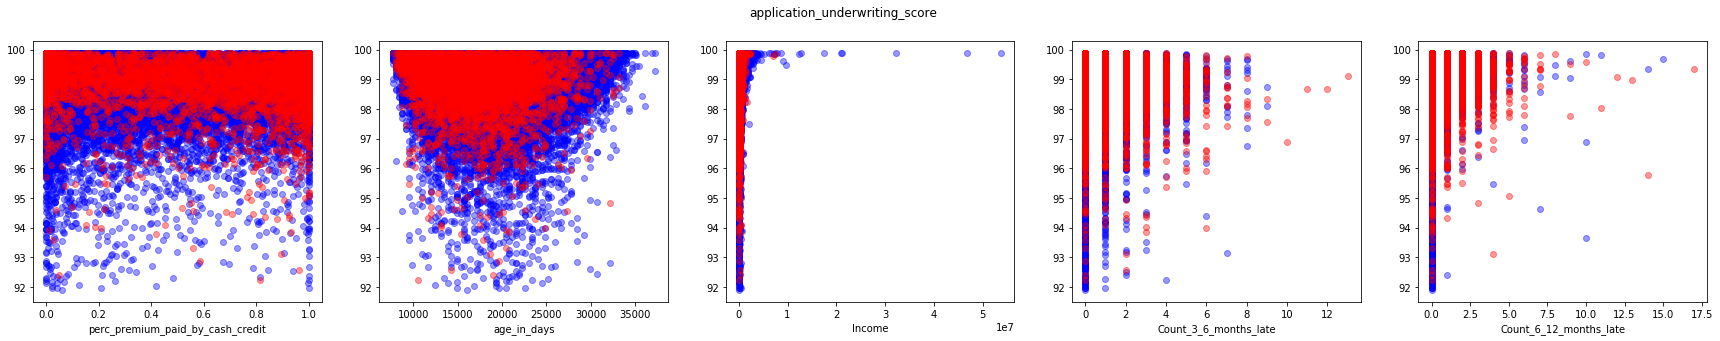

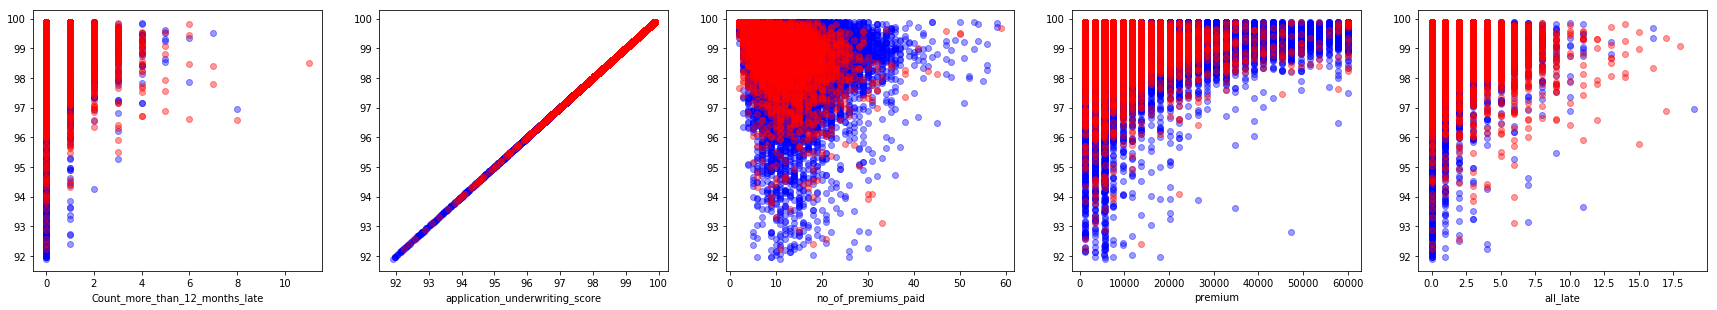

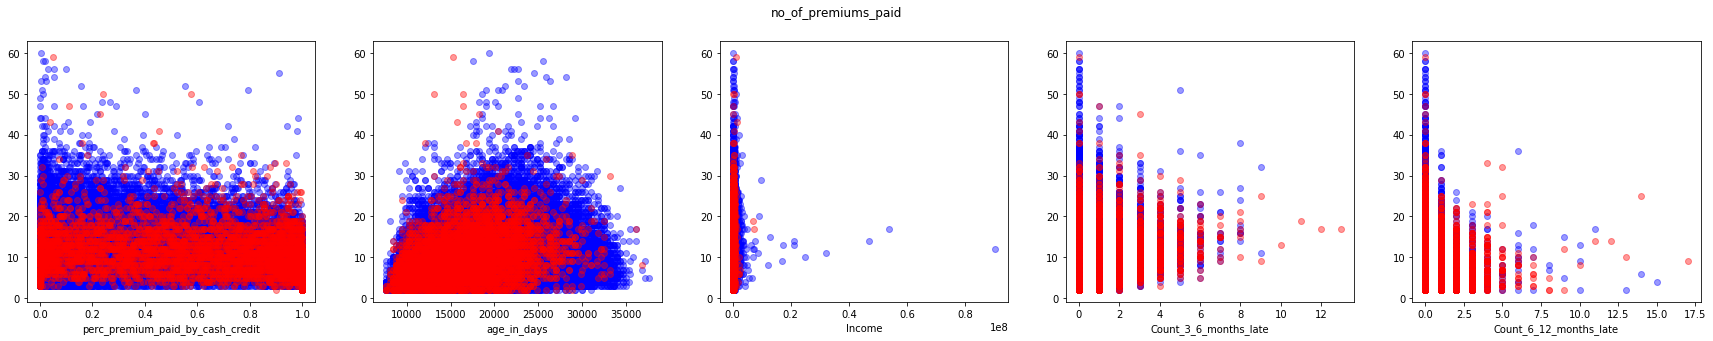

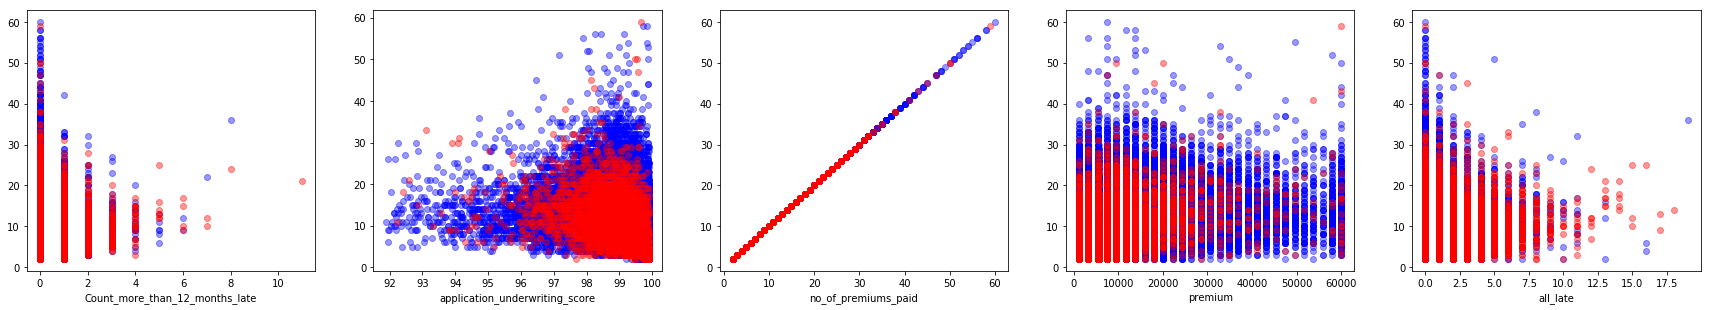

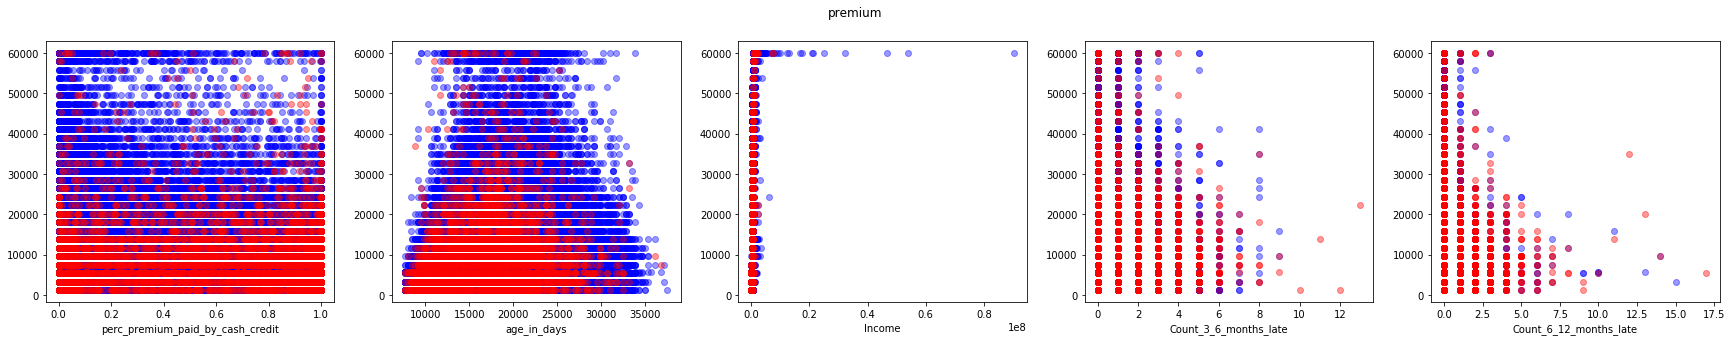

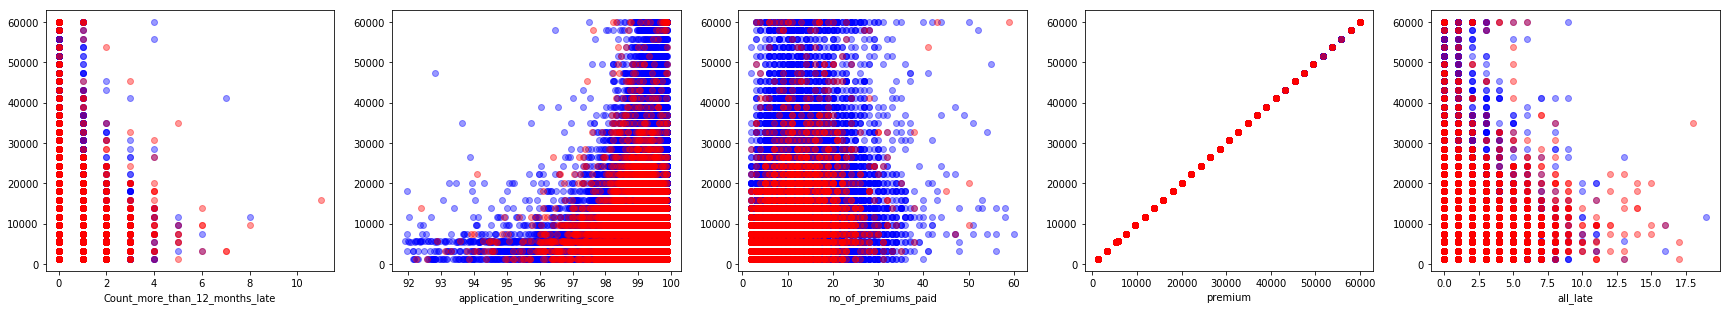

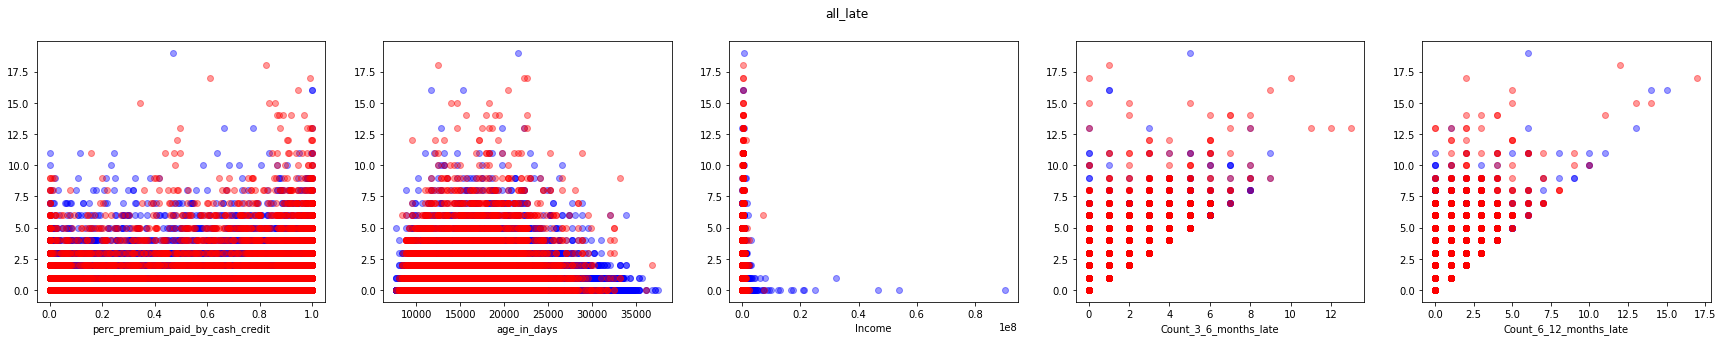

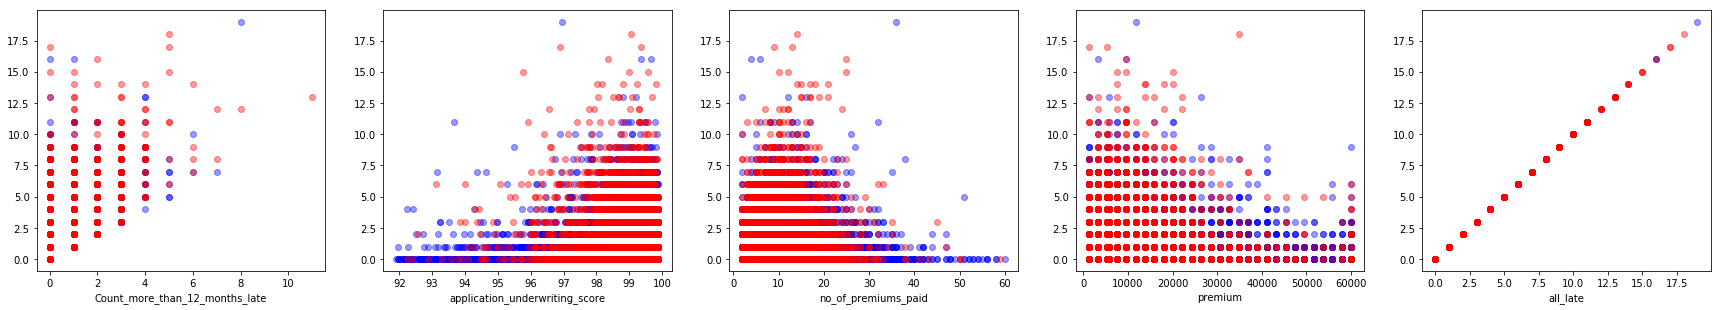

In [33]:
divisions = 5
alpha = 0.4
for column_1 in range(len(hist_columns)):
    column_2 = 0
    for group in range(int(len(hist_columns)/divisions)):
        fig = plt.figure(figsize=(30, 4.8))
        if group == 0:
            fig.suptitle(hist_columns[column_1])
        for subclass in range(divisions):
            try:
                ax = fig.add_subplot(int('1'+str(divisions)+str(subclass+1)))
                plt.xlabel(hist_columns[column_2])
                plt.plot(df.loc[df.cancel==0, hist_columns[column_2]], df.loc[df.cancel==0, hist_columns[column_1]],"bo",  alpha=alpha)
                plt.plot(df.loc[df.cancel==1, hist_columns[column_2]], df.loc[df.cancel==1, hist_columns[column_1]],"ro",  alpha=alpha) 
                column_2 +=1
            except IndexError:
                pass